# SGPS BioStatistics
## Exercise 3a: Dealing with uncertainty from raw experimental data
### Comparing gene expression of TNF, for different doses of LPS, for CRISPR-edited, cell lines.

#### Background on the data
+ Ankylosing Spondylitis is a chronic inflammatory disorder.
+ Through GWAS, the gene *TNFRSF1A* has been implicated in this disease.
+ Would like to understand the regulatory elements around this gene.
+ Using CRISPR/Cas9 to delete putative enhancers and then measured TNF expression for different doses of LPS using qPCR in the resulting cell lines.

In [1]:
# Import the packages we need
# Manipulate the data
import pandas as pd
import numpy as np
import scipy as sp
# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Get the data in
rep1 = pd.read_csv('TNF Dose response Rep 1 summary.csv', index_col=[0,1])
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     24.32     24.49         16.52   
                    1ng/ml           22.95     22.89         15.57   
                    10ng/ml          21.08     21.12         15.59   
                    100ng/ml         18.93     18.88         15.08   
                    1000ng/ml        19.42     19.30         15.41   
Intergenic enh C8.4 unstimulated     23.82     23.61         15.55   
                    1ng/ml           23.74     23.48         16.20   
                    10ng/ml          23.85     22.23         22.99   
                    100ng/ml         18.90     18.67         16.09   
                    1000ng/ml        19.50     19.46         15.81   
Intergenic enh G1   unstimulated     24.45     24.36         15.36   
                    1ng/ml           22.37     22.52         14.76   
                    10ng/ml          20.47     20.59         15.09   
                    100ng/ml         18.40     18.14         14.83   
                    1000ng/ml        20.27     20.02         14.70   
SFC840-03-03 Ctrl   unstimulated     25.36     25.19         16.28   
                    1ng/ml           24.08     23.95         16.15   
                    10ng/ml          21.77     21.67         15.85   
                    100ng/ml         20.25     19.97         16.75   
                    1000ng/ml        19.38     19.18         15.18   

                                  b-actin Cq 2  
cell_line           dose                        
Intron enh C5       unstimulated         16.48  
                    1ng/ml               15.59  
                    10ng/ml              15.44  
                    100ng/ml             15.08  
                    1000ng/ml            15.12  
Intergenic enh C8.4 unstimulated         15.51  
                    1ng/ml               15.91  
                    10ng/ml              17.64  
                    100ng/ml             15.58  
                    1000ng/ml            14.97  
Intergenic enh G1   unstimulated         15.47  
                    1ng/ml               14.48  
                    10ng/ml              14.66  
                    100ng/ml             14.80  
                    1000ng/ml            14.69  
SFC840-03-03 Ctrl   unstimulated         16.07  
                    1ng/ml               16.00  
                    10ng/ml              15.68  
                    100ng/ml             16.60  
                    1000ng/ml            15.06

In [3]:
# Let's find the mean between the two CQ
rep1['TNF_mean'] = rep1[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep1['b-actin_mean'] = rep1[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     24.32     24.49         16.52   
                    1ng/ml           22.95     22.89         15.57   
                    10ng/ml          21.08     21.12         15.59   
                    100ng/ml         18.93     18.88         15.08   
                    1000ng/ml        19.42     19.30         15.41   
Intergenic enh C8.4 unstimulated     23.82     23.61         15.55   
                    1ng/ml           23.74     23.48         16.20   
                    10ng/ml          23.85     22.23         22.99   
                    100ng/ml         18.90     18.67         16.09   
                    1000ng/ml        19.50     19.46         15.81   
Intergenic enh G1   unstimulated     24.45     24.36         15.36   
                    1ng/ml           22.37     22.52         14.76   
                    10ng/ml          20.47     20.59         15.09   
                    100ng/ml         18.40     18.14         14.83   
                    1000ng/ml        20.27     20.02         14.70   
SFC840-03-03 Ctrl   unstimulated     25.36     25.19         16.28   
                    1ng/ml           24.08     23.95         16.15   
                    10ng/ml          21.77     21.67         15.85   
                    100ng/ml         20.25     19.97         16.75   
                    1000ng/ml        19.38     19.18         15.18   

                                  b-actin Cq 2  TNF_mean  b-actin_mean  
cell_line           dose                                                
Intron enh C5       unstimulated         16.48    24.405        16.500  
                    1ng/ml               15.59    22.920        15.580  
                    10ng/ml              15.44    21.100        15.515  
                    100ng/ml             15.08    18.905        15.080  
                    1000ng/ml            15.12    19.360        15.265  
Intergenic enh C8.4 unstimulated         15.51    23.715        15.530  
                    1ng/ml               15.91    23.610        16.055  
                    10ng/ml              17.64    23.040        20.315  
                    100ng/ml             15.58    18.785        15.835  
                    1000ng/ml            14.97    19.480        15.390  
Intergenic enh G1   unstimulated         15.47    24.405        15.415  
                    1ng/ml               14.48    22.445        14.620  
                    10ng/ml              14.66    20.530        14.875  
                    100ng/ml             14.80    18.270        14.815  
                    1000ng/ml            14.69    20.145        14.695  
SFC840-03-03 Ctrl   unstimulated         16.07    25.275        16.175  
                    1ng/ml               16.00    24.015        16.075  
                    10ng/ml              15.68    21.720        15.765  
                    100ng/ml             16.60    20.110        16.675  
                    1000ng/ml            15.06    19.280        15.120

In [4]:
# Take away the house keeper gene's expression
rep1['DCT'] = rep1['TNF_mean'] - rep1['b-actin_mean']
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     24.32     24.49         16.52   
                    1ng/ml           22.95     22.89         15.57   
                    10ng/ml          21.08     21.12         15.59   
                    100ng/ml         18.93     18.88         15.08   
                    1000ng/ml        19.42     19.30         15.41   
Intergenic enh C8.4 unstimulated     23.82     23.61         15.55   
                    1ng/ml           23.74     23.48         16.20   
                    10ng/ml          23.85     22.23         22.99   
                    100ng/ml         18.90     18.67         16.09   
                    1000ng/ml        19.50     19.46         15.81   
Intergenic enh G1   unstimulated     24.45     24.36         15.36   
                    1ng/ml           22.37     22.52         14.76   
                    10ng/ml          20.47     20.59         15.09   
                    100ng/ml         18.40     18.14         14.83   
                    1000ng/ml        20.27     20.02         14.70   
SFC840-03-03 Ctrl   unstimulated     25.36     25.19         16.28   
                    1ng/ml           24.08     23.95         16.15   
                    10ng/ml          21.77     21.67         15.85   
                    100ng/ml         20.25     19.97         16.75   
                    1000ng/ml        19.38     19.18         15.18   

                                  b-actin Cq 2  TNF_mean  b-actin_mean    DCT  
cell_line           dose                                                       
Intron enh C5       unstimulated         16.48    24.405        16.500  7.905  
                    1ng/ml               15.59    22.920        15.580  7.340  
                    10ng/ml              15.44    21.100        15.515  5.585  
                    100ng/ml             15.08    18.905        15.080  3.825  
                    1000ng/ml            15.12    19.360        15.265  4.095  
Intergenic enh C8.4 unstimulated         15.51    23.715        15.530  8.185  
                    1ng/ml               15.91    23.610        16.055  7.555  
                    10ng/ml              17.64    23.040        20.315  2.725  
                    100ng/ml             15.58    18.785        15.835  2.950  
                    1000ng/ml            14.97    19.480        15.390  4.090  
Intergenic enh G1   unstimulated         15.47    24.405        15.415  8.990  
                    1ng/ml               14.48    22.445        14.620  7.825  
                    10ng/ml              14.66    20.530        14.875  5.655  
                    100ng/ml             14.80    18.270        14.815  3.455  
                    1000ng/ml            14.69    20.145        14.695  5.450  
SFC840-03-03 Ctrl   unstimulated         16.07    25.275        16.175  9.100  
                    1ng/ml               16.00    24.015        16.075  7.940  
                    10ng/ml              15.68    21.720        15.765  5.955  
                    100ng/ml             16.60    20.110        16.675  3.435  
                    1000ng/ml            15.06    19.280        15.120  4.160

In [5]:
# Take away the unstimulated cell lines' expression
ddct = []
unstimulated_value = 0
for i in rep1.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep1['DCT'].loc[i]
    ddct.append(rep1['DCT'].loc[i] - unstimulated_value)
rep1['DDCT'] = ddct
rep1['ExDDCT_rep1'] = 2**-rep1['DDCT']
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     24.32     24.49         16.52   
                    1ng/ml           22.95     22.89         15.57   
                    10ng/ml          21.08     21.12         15.59   
                    100ng/ml         18.93     18.88         15.08   
                    1000ng/ml        19.42     19.30         15.41   
Intergenic enh C8.4 unstimulated     23.82     23.61         15.55   
                    1ng/ml           23.74     23.48         16.20   
                    10ng/ml          23.85     22.23         22.99   
                    100ng/ml         18.90     18.67         16.09   
                    1000ng/ml        19.50     19.46         15.81   
Intergenic enh G1   unstimulated     24.45     24.36         15.36   
                    1ng/ml           22.37     22.52         14.76   
                    10ng/ml          20.47     20.59         15.09   
                    100ng/ml         18.40     18.14         14.83   
                    1000ng/ml        20.27     20.02         14.70   
SFC840-03-03 Ctrl   unstimulated     25.36     25.19         16.28   
                    1ng/ml           24.08     23.95         16.15   
                    10ng/ml          21.77     21.67         15.85   
                    100ng/ml         20.25     19.97         16.75   
                    1000ng/ml        19.38     19.18         15.18   

                                  b-actin Cq 2  TNF_mean  b-actin_mean    DCT  \
cell_line           dose                                                        
Intron enh C5       unstimulated         16.48    24.405        16.500  7.905   
                    1ng/ml               15.59    22.920        15.580  7.340   
                    10ng/ml              15.44    21.100        15.515  5.585   
                    100ng/ml             15.08    18.905        15.080  3.825   
                    1000ng/ml            15.12    19.360        15.265  4.095   
Intergenic enh C8.4 unstimulated         15.51    23.715        15.530  8.185   
                    1ng/ml               15.91    23.610        16.055  7.555   
                    10ng/ml              17.64    23.040        20.315  2.725   
                    100ng/ml             15.58    18.785        15.835  2.950   
                    1000ng/ml            14.97    19.480        15.390  4.090   
Intergenic enh G1   unstimulated         15.47    24.405        15.415  8.990   
                    1ng/ml               14.48    22.445        14.620  7.825   
                    10ng/ml              14.66    20.530        14.875  5.655   
                    100ng/ml             14.80    18.270        14.815  3.455   
                    1000ng/ml            14.69    20.145        14.695  5.450   
SFC840-03-03 Ctrl   unstimulated         16.07    25.275        16.175  9.100   
                    1ng/ml               16.00    24.015        16.075  7.940   
                    10ng/ml              15.68    21.720        15.765  5.955   
                    100ng/ml             16.60    20.110        16.675  3.435   
                    1000ng/ml            15.06    19.280        15.120  4.160   

                                   DDCT  ExDDCT_rep1  
cell_line           dose                              
Intron enh C5       unstimulated  0.000     1.000000  
                    1ng/ml       -0.565     1.479388  
                    10ng/ml      -2.320     4.993322  
                    100ng/ml     -4.080    16.912289  
                    1000ng/ml    -3.810    14.025692  
Intergenic enh C8.4 unstimulated  0.000     1.000000  
                    1ng/ml       -0.630     1.547565  
                    10ng/ml      -5.460    44.017338  
                    100ng/ml     -5.235    37.661016  
                    1000ng/ml    -4.095    17.089047  
Intergenic enh G1   unstimulated  0.000     1.0000

In [6]:
# Repeat for 2nd replicate
rep2 = pd.read_csv('TNF Dose response Rep 2 summary.csv', index_col=[0,1])
rep2['TNF_average'] = rep2[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep2['b-actin_average'] = rep2[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep2['DCT'] = rep2['TNF_average'] - rep2['b-actin_average']
ddct = []
unstimulated_value = 0
for i in rep2.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep2['DCT'].loc[i]
    ddct.append(rep2['DCT'].loc[i] - unstimulated_value)
rep2['DDCT'] = ddct
rep2['ExDDCT_rep2'] = 2**-rep2['DDCT']
rep2

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     27.65     27.97         18.68   
                    1ng/ml           25.82     25.64         18.67   
                    10ng/ml          23.64     23.59         17.45   
                    100ng/ml         22.82     22.61         17.92   
                    1000ng/ml        23.29     23.02         17.19   
Intergenic enh C8.4 unstimulated     25.63     25.49         16.69   
                    1ng/ml           22.01     21.92         16.12   
                    10ng/ml          22.69     22.30         16.80   
                    100ng/ml         24.07     23.57         17.82   
                    1000ng/ml        24.43     24.24         18.43   
Intergenic enh G1   unstimulated     23.62     23.92         15.73   
                    1ng/ml           20.27     20.73         14.77   
                    10ng/ml          21.35     21.79         15.21   
                    100ng/ml         23.02     23.31         15.45   
                    1000ng/ml        24.63     25.02         16.45   
SFC840-03-03 Ctrl   unstimulated     26.92     26.96         18.18   
                    1ng/ml           31.57     27.03         19.39   
                    10ng/ml          27.30     27.57         20.45   
                    100ng/ml         25.14     25.30         19.34   
                    1000ng/ml        23.44     23.50         17.80   

                                  b-actin Cq 2  TNF_average  b-actin_average  \
cell_line           dose                                                       
Intron enh C5       unstimulated         18.84       27.810           18.760   
                    1ng/ml               18.63       25.730           18.650   
                    10ng/ml              17.44       23.615           17.445   
                    100ng/ml             17.91       22.715           17.915   
                    1000ng/ml            17.09       23.155           17.140   
Intergenic enh C8.4 unstimulated         16.72       25.560           16.705   
                    1ng/ml               15.82       21.965           15.970   
                    10ng/ml              16.63       22.495           16.715   
                    100ng/ml             17.89       23.820           17.855   
                    1000ng/ml            18.31       24.335           18.370   
Intergenic enh G1   unstimulated         15.67       23.770           15.700   
                    1ng/ml               14.32       20.500           14.545   
                    10ng/ml              15.01       21.570           15.110   
                    100ng/ml             15.08       23.165           15.265   
                    1000ng/ml            16.52       24.825           16.485   
SFC840-03-03 Ctrl   unstimulated         17.88       26.940           18.030   
                    1ng/ml               18.59       29.300           18.990   
                    10ng/ml              19.67       27.435           20.060   
                    100ng/ml             18.65       25.220           18.995   
                    1000ng/ml            17.69       23.470           17.745   

                                     DCT   DDCT  ExDDCT_rep2  
cell_line           dose                                      
Intron enh C5       unstimulated   9.050  0.000     1.000000  
                    1ng/ml         7.080 -1.970     3.917681  
                    10ng/ml        6.170 -2.880     7.361501  
                    100ng/ml       4.800 -4.250    19.027314  
                    1000ng/ml      6.015 -3.035     8.196455  
Intergenic enh C8.4 unstimulated   8.855  0.000     1.000000  
                    1ng/ml         5.995 -2.860     7.260153  
                    10ng/ml        5.780 -3.075     8.426888  
                    100ng/ml       5.965 -2.890     7.412704  
                    1000ng/ml      5.96

In [7]:
# Repeat 3rd replicate
rep3 = pd.read_csv('TNF Dose response Rep 3 summary.csv', index_col=[0,1])
rep3['TNF_average'] = rep3[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep3['b-actin_average'] = rep3[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep3['DCT'] = rep3['TNF_average'] - rep3['b-actin_average']
ddct = []
unstimulated_value = 0
for i in rep3.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep3['DCT'].loc[i]
    ddct.append(rep3['DCT'].loc[i] - unstimulated_value)
rep3['DDCT'] = ddct
rep3['ExDDCT_rep3'] = 2**-rep3['DDCT']
rep3

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
cell_line           dose                                             
Intron enh C5       unstimulated     27.01     27.39         19.65   
                    1ng/ml           23.23     22.57         18.57   
                    10ng/ml          22.47     22.68         17.78   
                    100ng/ml         23.85     24.16         19.33   
                    1000ng/ml        24.49     24.66         19.24   
Intergenic enh C8.4 unstimulated     26.30     26.44         18.33   
                    1ng/ml           23.86     24.17         18.13   
                    10ng/ml          23.50     23.48         17.56   
                    100ng/ml         23.71     23.59         18.51   
                    1000ng/ml        23.32     23.33         17.67   
Intergenic enh G1   unstimulated     26.33     26.60         18.10   
                    1ng/ml           23.96     24.23         19.96   
                    10ng/ml          21.68     21.70         16.83   
                    100ng/ml         21.66     21.81         16.43   
                    1000ng/ml        24.02     24.01         17.35   
SFC840-03-03 Ctrl   unstimulated     27.98     27.97         19.60   
                    1ng/ml           24.94     25.16         18.21   
                    10ng/ml          24.98     25.10         18.96   
                    100ng/ml         22.77     22.66         18.31   
                    1000ng/ml        23.58     23.51         18.86   

                                  b-actin Cq 2  TNF_average  b-actin_average  \
cell_line           dose                                                       
Intron enh C5       unstimulated         19.59       27.200           19.620   
                    1ng/ml               18.45       22.900           18.510   
                    10ng/ml              17.73       22.575           17.755   
                    100ng/ml             19.21       24.005           19.270   
                    1000ng/ml            21.93       24.575           20.585   
Intergenic enh C8.4 unstimulated         18.04       26.370           18.185   
                    1ng/ml               17.68       24.015           17.905   
                    10ng/ml              17.21       23.490           17.385   
                    100ng/ml             18.32       23.650           18.415   
                    1000ng/ml            17.46       23.325           17.565   
Intergenic enh G1   unstimulated         18.08       26.465           18.090   
                    1ng/ml               19.78       24.095           19.870   
                    10ng/ml              16.58       21.690           16.705   
                    100ng/ml             16.16       21.735           16.295   
                    1000ng/ml            18.44       24.015           17.895   
SFC840-03-03 Ctrl   unstimulated         24.97       27.975           22.285   
                    1ng/ml               17.86       25.050           18.035   
                    10ng/ml              18.32       25.040           18.640   
                    100ng/ml             17.93       22.715           18.120   
                    1000ng/ml            18.44       23.545           18.650   

                                    DCT   DDCT  ExDDCT_rep3  
cell_line           dose                                     
Intron enh C5       unstimulated  7.580  0.000     1.000000  
                    1ng/ml        4.390 -3.190     9.126110  
                    10ng/ml       4.820 -2.760     6.773962  
                    100ng/ml      4.735 -2.845     7.185059  
                    1000ng/ml     3.990 -3.590    12.041974  
Intergenic enh C8.4 unstimulated  8.185  0.000     1.000000  
                    1ng/ml        6.110 -2.075     4.213444  
                    10ng/ml       6.105 -2.080     4.228072  
                    100ng/ml      5.235 -2.950     7.727491  
                    1000ng/ml     5.760 -2.425    

In [8]:
# Lets collect the data together
all_reps = pd.concat([rep1['ExDDCT_rep1'],rep2['ExDDCT_rep2'],rep3['ExDDCT_rep3']],axis=1)
all_reps

ExDDCT_rep1  ExDDCT_rep2  ExDDCT_rep3
cell_line           dose                                               
Intron enh C5       unstimulated     1.000000     1.000000     1.000000
                    1ng/ml           1.479388     3.917681     9.126110
                    10ng/ml          4.993322     7.361501     6.773962
                    100ng/ml        16.912289    19.027314     7.185059
                    1000ng/ml       14.025692     8.196455    12.041974
Intergenic enh C8.4 unstimulated     1.000000     1.000000     1.000000
                    1ng/ml           1.547565     7.260153     4.213444
                    10ng/ml         44.017338     8.426888     4.228072
                    100ng/ml        37.661016     7.412704     7.727491
                    1000ng/ml       17.089047     7.412704     5.370290
Intergenic enh G1   unstimulated     1.000000     1.000000     1.000000
                    1ng/ml           2.242332     4.331900    17.753112
                    10ng/ml         10.091019     3.052518    10.483147
                    100ng/ml        46.366149     1.125058     7.647563
                    1000ng/ml       11.631780     0.829320     4.773343
SFC840-03-03 Ctrl   unstimulated     1.000000     1.000000     1.000000
                    1ng/ml           2.234574     0.378929     0.399149
                    10ng/ml          8.845845     2.897884     0.611320
                    100ng/ml        50.738185     6.430808     2.136131
                    1000ng/ml       30.696452     9.094536     1.735077

### We want to plot the data, however we also want to add in error bars.
Read the following paper, to get a good idea of what we mean by "error bars".
+  Krzywinski, M & Altman, N, Error bars. Nat Methods 10, 921–922 (2013): https://www.nature.com/articles/nmeth.2659

In [9]:
# Calculate what we need for error bars
all_reps['Mean'] = all_reps[['ExDDCT_rep1', 'ExDDCT_rep2', 'ExDDCT_rep3']].mean(axis=1)
all_reps['StDev'] = all_reps[['ExDDCT_rep1', 'ExDDCT_rep2', 'ExDDCT_rep3']].std(axis=1)
all_reps['StErr'] = all_reps['StDev'] / np.sqrt(3)

# Calculate the t-critical value for 95% confidence level and 2 degrees of freedom
t_critical = sp.stats.t.ppf(0.975, df=2)  # 0.975 corresponds to a two-tailed 95% confidence interval
print(t_critical)

# Use the calculated t-critical value to compute the confidence interval
all_reps['CI_95'] = all_reps['StErr'] * t_critical

all_reps

4.302652729696142


ExDDCT_rep1  ExDDCT_rep2  ExDDCT_rep3  \
cell_line           dose                                                  
Intron enh C5       unstimulated     1.000000     1.000000     1.000000   
                    1ng/ml           1.479388     3.917681     9.126110   
                    10ng/ml          4.993322     7.361501     6.773962   
                    100ng/ml        16.912289    19.027314     7.185059   
                    1000ng/ml       14.025692     8.196455    12.041974   
Intergenic enh C8.4 unstimulated     1.000000     1.000000     1.000000   
                    1ng/ml           1.547565     7.260153     4.213444   
                    10ng/ml         44.017338     8.426888     4.228072   
                    100ng/ml        37.661016     7.412704     7.727491   
                    1000ng/ml       17.089047     7.412704     5.370290   
Intergenic enh G1   unstimulated     1.000000     1.000000     1.000000   
                    1ng/ml           2.242332     4.331900    17.753112   
                    10ng/ml         10.091019     3.052518    10.483147   
                    100ng/ml        46.366149     1.125058     7.647563   
                    1000ng/ml       11.631780     0.829320     4.773343   
SFC840-03-03 Ctrl   unstimulated     1.000000     1.000000     1.000000   
                    1ng/ml           2.234574     0.378929     0.399149   
                    10ng/ml          8.845845     2.897884     0.611320   
                    100ng/ml        50.738185     6.430808     2.136131   
                    1000ng/ml       30.696452     9.094536     1.735077   

                                       Mean      StDev      StErr      CI_95  
cell_line           dose                                                      
Intron enh C5       unstimulated   1.000000   0.000000   0.000000   0.000000  
                    1ng/ml         4.841059   3.906093   2.255184   9.703272  
                    10ng/ml        6.376262   1.233164   0.711967   3.063348  
                    100ng/ml      14.374887   6.315739   3.646393  15.689165  
                    1000ng/ml     11.421373   2.963758   1.711126   7.362382  
Intergenic enh C8.4 unstimulated   1.000000   0.000000   0.000000   0.000000  
                    1ng/ml         4.340387   2.858409   1.650303   7.100682  
                    10ng/ml       18.890766  21.861289  12.621621  54.306454  
                    100ng/ml      17.600404  17.373713  10.030718  43.158695  
                    1000ng/ml      9.957347   6.260089   3.614264  15.550924  
Intergenic enh G1   unstimulated   1.000000   0.000000   0.000000   0.000000  
                    1ng/ml         8.109115   8.417041   4.859581  20.909089  
                    10ng/ml        7.875562   4.181477   2.414177  10.387365  
                    100ng/ml      18.379590  24.455498  14.119388  60.750825  
                    1000ng/ml      5.744814   5.466361   3.156005  13.579194  
SFC840-03-03 Ctrl   unstimulated   1.000000   0.000000   0.000000   0.000000  
                    1ng/ml         1.004218   1.065568   0.615206   2.647018  
                    10ng/ml        4.118350   4.250765   2.454180  10.559486  
                    100ng/ml      19.768374  26.906466  15.534455  66.839367  
                    1000ng/ml     13.842022  15.053048   8.690882  37.393845

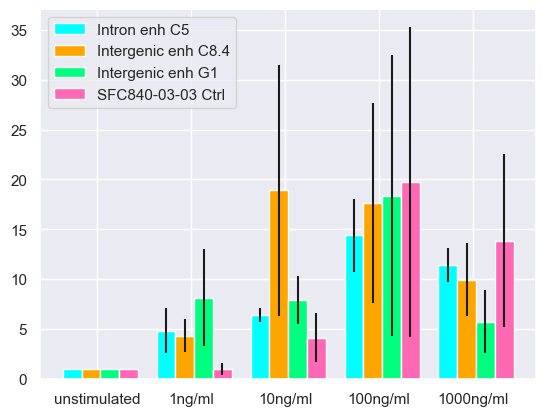

In [10]:
# Lets plot them!
fig, ax = plt.subplots()
cell_lines = {'Intron enh C5':'aqua', 
              'Intergenic enh C8.4':'orange', 
              'Intergenic enh G1':'springgreen', 
              'SFC840-03-03 Ctrl':'hotpink'}

w = 0.2
ind = np.arange(len(all_reps.loc['Intron enh C5'].index))
for c,cell_line in enumerate(cell_lines):
    ax.bar(ind + ((c-1.33)*w), 
            all_reps['Mean'].loc[cell_line].values,
            width = w,
            yerr=all_reps['StErr'].loc[cell_line].values,
            align='center',
            color=cell_lines[cell_line], 
            label=cell_line)


plt.xticks(ind, all_reps.loc['Intron enh C5'].index.values)
plt.legend(loc=2)

In [11]:
# How about statitical test to see if there are differences within one of the cell lines?
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Filter data for "Intron enh C5"
intron_enh_c5 = all_reps.loc['Intron enh C5']

# Melt the dataframe for One-Way ANOVA
intron_enh_c5_melt = intron_enh_c5.reset_index().melt(id_vars=['dose'], value_vars=['ExDDCT_rep1', 'ExDDCT_rep2', 'ExDDCT_rep3'],
                                                      var_name='Replicate', value_name='Expression')

# Perform One-Way ANOVA
model = ols('Expression ~ C(dose)', data=intron_enh_c5_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA results for 'Intron enh C5':\n", anova_table)

One-Way ANOVA results for 'Intron enh C5':
               sum_sq    df         F    PR(>F)
C(dose)   339.513723   4.0  6.484153  0.007689
Residual  130.901335  10.0       NaN       NaN


In [12]:
# Can we tell which groups are significantly different - using Tukey's honest significance test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=intron_enh_c5_melt['Expression'], groups=intron_enh_c5_melt['dose'], alpha=0.05)

# Print the results
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2    meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
1000ng/ml     100ng/ml   2.9535 0.8497  -6.7687 12.6757  False
1000ng/ml      10ng/ml  -5.0451 0.4709 -14.7673  4.6771  False
1000ng/ml       1ng/ml  -6.5803  0.245 -16.3025  3.1419  False
1000ng/ml unstimulated -10.4214 0.0346 -20.1436 -0.6992   True
 100ng/ml      10ng/ml  -7.9986 0.1224 -17.7208  1.7236  False
 100ng/ml       1ng/ml  -9.5338 0.0552  -19.256  0.1884  False
 100ng/ml unstimulated -13.3749 0.0075 -23.0971 -3.6527   True
  10ng/ml       1ng/ml  -1.5352 0.9833 -11.2574   8.187  False
  10ng/ml unstimulated  -5.3763  0.414 -15.0985   4.346  False
   1ng/ml unstimulated  -3.8411 0.6972 -13.5633  5.8812  False
--------------------------------------------------------------


In [13]:
# Melt the dataframe for Two-Way ANOVA
all_reps_melt = all_reps.reset_index().melt(id_vars=['cell_line', 'dose'], value_vars=['ExDDCT_rep1', 'ExDDCT_rep2', 'ExDDCT_rep3'],
                                            var_name='Replicate', value_name='Expression')

all_reps_melt

,cell_line,dose,Replicate,Expression
0,Intron enh C5,unstimulated,ExDDCT_rep1,1.000000
1,Intron enh C5,1ng/ml,ExDDCT_rep1,1.479388
2,Intron enh C5,10ng/ml,ExDDCT_rep1,4.993322
3,Intron enh C5,100ng/ml,ExDDCT_rep1,16.912289
4,Intron enh C5,1000ng/ml,ExDDCT_rep1,14.025692
5,Intergenic enh C8.4,unstimulated,ExDDCT_rep1,1.000000
6,Intergenic enh C8.4,1ng/ml,ExDDCT_rep1,1.547565
7,Intergenic enh C8.4,10ng/ml,ExDDCT_rep1,44.017338
8,Intergenic enh C8.4,100ng/ml,ExDDCT_rep1,37.661016
9,Intergenic enh C8.4,1000ng/ml,ExDDCT_rep1,17.089047


In [14]:
# Perform Two-Way ANOVA
model = ols('Expression ~ C(cell_line) + C(dose) + C(cell_line):C(dose)', data=all_reps_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA results:\n", anova_table)

Two-Way ANOVA results:
                            sum_sq    df         F    PR(>F)
C(cell_line)            69.539389   3.0  0.179785  0.909489
C(dose)               1882.959862   4.0  3.651111  0.012571
C(cell_line):C(dose)   545.831141  12.0  0.352794  0.972384
Residual              5157.224398  40.0       NaN       NaN
